# SMS Spam Classifier (naive_bayes)

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading

In [2]:
data=pd.read_excel('./datasets/spam.xlsx')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## PipeLine for the project
- 1. Data cleaning
- 2. EDA
- 3. Text Preprocessing
- 4. Model building
- 5. Evaluation
- 6. Improvement
- 7. making pipeline
- 8. deploy

### 1. Data Cleaning

In [3]:
data.shape

(5572, 5)

In [4]:
data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [5]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
data.isna().sum()/data.shape[0]*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

**Will drop the last 3 columns as >99% of the data is empty** 

In [8]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [9]:
data.shape

(5572, 2)

In [10]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.rename(columns={'v1':'target','v2':'sms'},inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
data.isna().sum()/data.shape[0]*100

target    0.0
sms       0.0
dtype: float64

In [14]:
# Checking for duplicate values
data.duplicated().sum()

403

**droping the duplicated columns by keeping the first data**

In [15]:
data=data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

0

### 2.EDA

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
data.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Converting target column data into 0s and 1s**
- ham = 0
- spam = 1

In [19]:
data['target']=data.target.apply(lambda x: 0 if x=='ham' else 1)

C:\Users\dell\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data.head()

,target,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data['sms']=data.sms.astype(str)

C:\Users\dell\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:ylabel='target'>

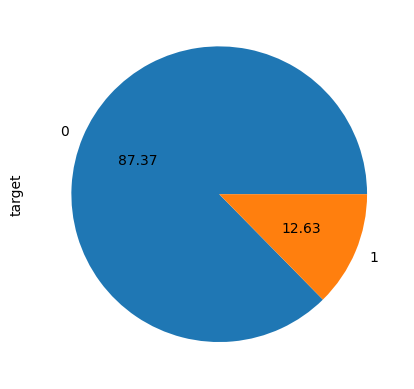

In [22]:
data.target.value_counts().plot(kind='pie',autopct="%0.2f")

**Data is very imbalanced as most of the data is of traget 1 (ham)**

**Making new columns**
- character count
- words count
- sentence count

In [23]:
# character count
data['character']=data['sms'].apply(len)

C:\Users\dell\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
data.head()

,target,sms,character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# word count
data['word']=data['sms'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\dell\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# sentence count
data['sentence']=data['sms'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\dell\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
data.head()

,target,sms,character,word,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
data.describe()

,target,character,word,sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.980267,18.455794,1.965564
std,0.332253,58.239404,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
# ham
data[data.target==0].describe()

,target,character,word,sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.461913,17.123782,1.820195
std,0.0,56.362288,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [30]:
# spam
data[data.target==1].describe()

,target,character,word,sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


**Normally spam sms are longer and ham**

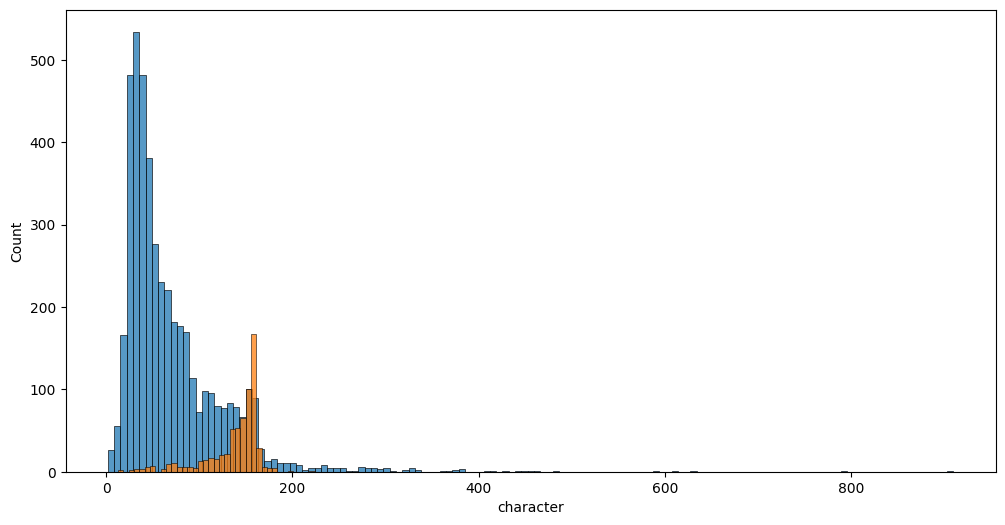

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['character'])
sns.histplot(data[data['target'] == 1]['character'])
plt.show()

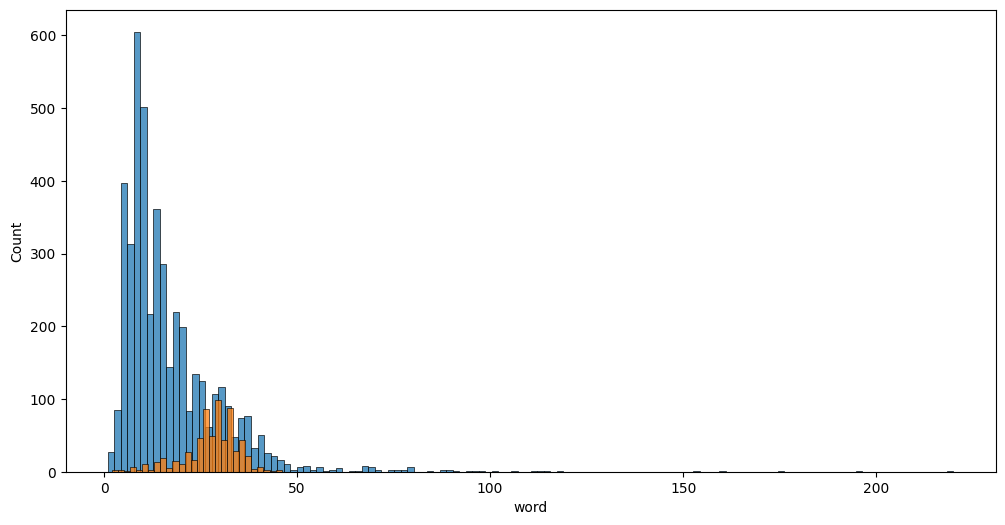

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['word'])
sns.histplot(data[data['target'] == 1]['word'])
plt.show()

<AxesSubplot:>

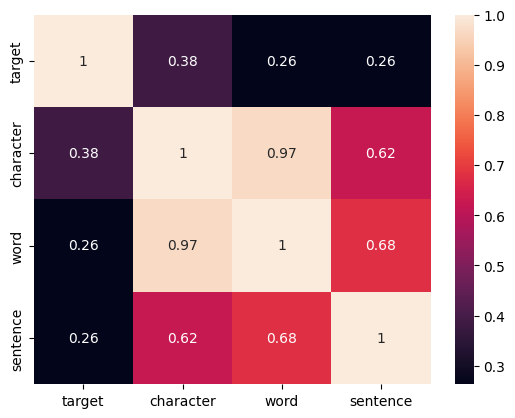

In [33]:
sns.heatmap(data.corr(),annot=True)

**`word`, `sentence` and `character` are highly coorelated to each other thus we will use any one of them as a parameter in the model**

### 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [34]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation
ps = PorterStemmer()

In [36]:
def transform_text(text):
    # lowercase
    text = text.lower()
    # tokenization
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y.copy()
    y.clear()
    
    #Removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    #Stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [37]:
data['processed_sms']=data['sms'].apply(transform_text)

C:\Users\dell\.conda\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
data

,target,sms,character,word,sentence,processed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [39]:
spam_corpus = []
for msg in data[data['target'] == 1]['processed_sms'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
ham_corpus = []
for msg in data[data['target'] == 0]['processed_sms'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

**Total number of words in spam and ham**

In [40]:
len(spam_corpus),len(ham_corpus)

(9939, 35402)

In [41]:
# count of each word in spam
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [42]:
# count of each word in ham

Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

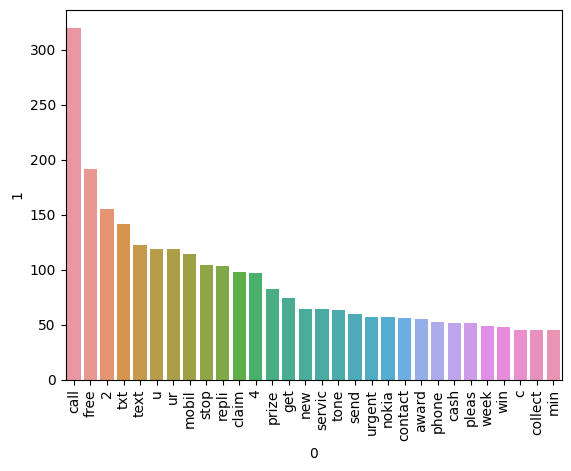

In [43]:
spam_corpus_df=pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_corpus_df[0],y=spam_corpus_df[1])
plt.xticks(rotation=90)
plt.show()

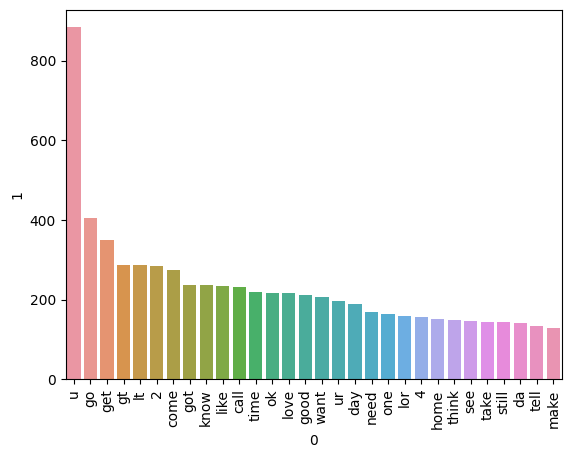

In [44]:
ham_corpus_df=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_corpus_df[0],y=ham_corpus_df[1])
plt.xticks(rotation=90)
plt.show()

### 4. Model Building
### 5. Model Evaluation

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
cv = CountVectorizer()
tf = TfidfVectorizer()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [46]:
# using TfidfVectorizer
X = cv.fit_transform(data.processed_sms).toarray()

In [47]:
X.shape

(5169, 6708)

In [48]:
y = data['target'].values

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
for m in [gnb,mnb,bnb]:
    print("="*20,m,"="*20)
    m.fit(X_train,y_train)
    y_pred1 = m.predict(X_test)
    print("accuracy",accuracy_score(y_test,y_pred1))
    print(confusion_matrix(y_test,y_pred1))
    print("precision",precision_score(y_test,y_pred1))

==================== GaussianNB() ====================
accuracy 0.8684719535783365
[[772 117]
 [ 19 126]]
precision 0.5185185185185185
==================== MultinomialNB() ====================
accuracy 0.9738878143133463
[[872  17]
 [ 10 135]]
precision 0.8881578947368421
==================== BernoulliNB() ====================
accuracy 0.9661508704061895
[[885   4]
 [ 31 114]]
precision 0.9661016949152542


**`BernoulliNB()` is performing the best out the rest however we will try to improve the model futher more**

### 6. Improvement 

In [51]:
# using TfidfVectorizer
X = tf.fit_transform(data.processed_sms).toarray()

In [52]:
X.shape

(5169, 6708)

In [53]:
y = data['target'].values

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
for m in [gnb,mnb,bnb]:
    print("="*20,m,"="*20)
    m.fit(X_train,y_train)
    y_pred1 = m.predict(X_test)
    print("accuracy",accuracy_score(y_test,y_pred1))
    print(confusion_matrix(y_test,y_pred1))
    print("precision",precision_score(y_test,y_pred1))

==================== GaussianNB() ====================
accuracy 0.8636363636363636
[[772 117]
 [ 24 121]]
precision 0.5084033613445378
==================== MultinomialNB() ====================
accuracy 0.9613152804642167
[[888   1]
 [ 39 106]]
precision 0.9906542056074766
==================== BernoulliNB() ====================
accuracy 0.9661508704061895
[[885   4]
 [ 31 114]]
precision 0.9661016949152542


**`MultinomialNB()` is performing the best out the rest while using TfidfVectorizer this to fit the X we will use it**

**We have kept the `TfidfVectorizer()` to its default setting now we will try to hypertune it and see is we get any improvements**

In [56]:
for i in [500,1000,2000,2500,3000,3500]:
    print("="*20 ,"max features=",i,"="*20)
    tf = TfidfVectorizer(max_features=i)
    X = tf.fit_transform(data.processed_sms).toarray()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
    for m in [mnb,bnb]:
        print("="*20,m,"="*20)
        m.fit(X_train,y_train)
        y_pred1 = m.predict(X_test)
        print("accuracy",accuracy_score(y_test,y_pred1))
#         print(confusion_matrix(y_test,y_pred1))
        print("precision",precision_score(y_test,y_pred1))

==================== max features= 500 ====================
==================== MultinomialNB() ====================
accuracy 0.9709864603481625
precision 0.9655172413793104
==================== BernoulliNB() ====================
accuracy 0.9787234042553191
precision 0.9603174603174603
==================== max features= 1000 ====================
==================== MultinomialNB() ====================
accuracy 0.97678916827853
precision 0.9913793103448276
==================== BernoulliNB() ====================
accuracy 0.9835589941972921
precision 0.9763779527559056
==================== max features= 2000 ====================
==================== MultinomialNB() ====================
accuracy 0.9758220502901354
precision 1.0
==================== BernoulliNB() ====================
accuracy 0.9864603481624759
precision 0.9920634920634921
==================== max features= 2500 ====================
==================== MultinomialNB() ====================
accuracy 0.9748549323017408
prec

`3000` is the optimal max features to go with and `MultinomialNB()` will be the model we will use

**We will also try scalling X to see if there is any improvements in the model**

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = tf.fit_transform(data.processed_sms).toarray()
X = scaler.fit_transform(X)



tf = TfidfVectorizer(max_features=3000)
y = data['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision",precision_score(y_test,y_pred1))

accuracy 0.9787234042553191
[[887   9]
 [ 13 125]]
precision 0.9328358208955224


**The precision has degraded thus scalling is not a good option thus we are sticking with the last model as our `final model`**

In [58]:
tf = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(data.processed_sms).toarray()
y = data['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision",precision_score(y_test,y_pred1))

accuracy 0.971953578336557
[[896   0]
 [ 29 109]]
precision 1.0


### 7. Making pipeline

In [59]:
from sklearn.pipeline import make_pipeline

In [60]:
model=make_pipeline(tf,mnb)
X = data.processed_sms
y = data['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(max_features=3000)),
                ('multinomialnb', MultinomialNB())])

In [61]:
# from nltk.stem.porter import PorterStemmer
# from nltk.corpus import stopwords
# from collections import Counter
# from string import punctuation
# ps = PorterStemmer()

# def transform_text(text):
#     # lowercase
#     text = text.lower()
#     # tokenization
#     text = nltk.word_tokenize(text)
    
#     # Removing special characters
#     y = []
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y.copy()
#     y.clear()
    
#     #Removing stop words and punctuation
#     for i in text:
#         if i not in stopwords.words('english') and i not in punctuation:
#             y.append(i)
            
#     text = y.copy()
#     y.clear()
    
#     #Stemming
#     for i in text:
#         y.append(ps.stem(i))
    
            
#     return " ".join(y)

In [62]:
def pred(text):
    print(text)
    txt=transform_text(text)
    ans=model.predict([txt])
    if(ans==0):
        return 'ham'
    else:
        return 'spam'

In [63]:
pred(data.sms[295])

T-Mobile customer you may now claim your FREE CAMERA PHONE upgrade & a pay & go sim card for your loyalty. Call on 0845 021 3680.Offer ends 28thFeb.T&C's apply


'spam'

### 8. Deploying

In [64]:
import pickle
pickle.dump(model,open('sms_model.pkl','wb'))